# Assignment 1: Statistical Simulation from First Principles

### ID: 72401030        Name: Liuxiang TAN

## 1. Overview & Rules (Read Carefully)
**Objective:**


 The goal of this assignment is to understand the mathematical foundations behind random number generation. You will implement generators for four specific distributions from scratch, using only a basic Uniform(0,1) source.

- Generate parameters based on your Student ID (logic provided).
- Implement the four generator functions.
- **Bonus/Improvement:** While the default task requires $N=1000$, you are encouraged to try larger sample sizes (e.g., $N=10,000$) to see if the histograms fit the theoretical curves better.


#### Strict Constraints:
#### 1. Allowed Libraries:

- `numpy` (Only for basic array operations and `np.random.rand()` / `np.random.seed()`).

- `matplotlib.pyplot` (For plotting).

- `math` (For mathematical constants/functions like log, pi, sqrt, cos, sin).

- `scipy.stats` (Strictly ONLY for calculating the theoretical PDF/PMF curves for verification).

#### 2. Forbidden Libraries/Functions:

- You are **STRICTLY PROHIBITED** from using high-level simulation functions to generate your data, such as: `np.random.normal`, `np.random.binomial`, `np.random.exponential`, `np.random.uniform`, or any distribution generators from `scipy`.

- Penalty: Using banned functions will result in a ZERO score for that task.

#### 3. Academic Integrity:

Plagiarism or using AI tools (like ChatGPT/Copilot/Gemini...) to write the core logic is forbidden. Code similarity checks will be performed.

## 2. Environment Setup

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Set your Student ID here
STUDENT_ID = 72401030  # <--- REPLACE WITH YOUR ID

## 3. Implementation (Fill in the blocks)
#### 3.1 Parameter Helper
This function is provided to ensure you use the correct parameters.

In [9]:
def get_parameters(student_id):
    """
    Parses Student ID to derive unique distribution parameters.
    """
    s_id_str = str(student_id)
    d1 = int(s_id_str[-1])  # Last digit
    d2 = int(s_id_str[-2])  # Second to last digit
    
    params = {
        'd1': d1,
        'd2': d2,
        'binom_n': 20 + (d1 * 2),
        'binom_p': min(0.3 + (d2 * 0.05), 0.9),
        'uni_a': -d2,
        'uni_b': d1 + 5,
        'exp_lam': 0.5 + (d1 % 5) * 0.2,
        'norm_mu': d1,
        'norm_sigma': (d2 % 3) + 1
    }
    return params

#### 3.2 Distribution Functions
**Instructions** :Implement the following functions. You must use `np.random.rand()` to get `Uniform(0,1)` numbers and transform them using the specified mathematical methods.

#### 3.2.1 Simulating Binomial(n,𝜃) Distribution (Use Method 2)

In [10]:
def generate_binomial_scratch(n, p, size):
    """
    Generates Binomial(n, p) data.
    
    Method Requirement:
    - Do NOT use the Inverse Transform Method here.
    - Instead, simulate 'n' independent Bernoulli trials for each sample.
    - If a random number U < p, it is a success (1), otherwise failure (0).
    - Sum the successes to get the binomial value.
    """
    # TODO: Implement this function from scratch
    # Hint: You might need a matrix of random numbers of shape (size, n)
    
    # a matrix of random numbers
    Random_num_mtx = np.random.rand(size, n) 
    results = []
    
    for i in range (size):
        cnt = 0
        for j in range (n):
            if Random_num_mtx[i][j] < p:
                cnt += 1
        results.append(cnt)

    return results

generate_binomial_scratch(4, 0.3, 4)

[1, 0, 1, 1]

#### 3.2.2 Simulating Uniform[L,R] Distribution
It is quite straightforward to generate X~Uniform[L,R].

In [11]:
def generate_uniform_scratch(a, b, size):
    """
    Generates Uniform(a, b) data.
    
    Method Requirement:
    - Apply the standard Linear Transformation to scale Uniform(0,1) to [a, b].
    """
    # TODO: Implement this function from scratch
    Random_num_mtx_ab = a + (b - a) * np.random.rand(size) 
    
    return Random_num_mtx_ab

generate_uniform_scratch(1, 6, 80)

array([3.00370869, 1.86464904, 2.88273114, 2.72641544, 3.28614994,
       1.33949619, 2.98282088, 2.11561728, 5.71085741, 2.6024204 ,
       2.66426801, 1.28538763, 1.57629177, 5.70462554, 3.85402457,
       2.51190375, 4.40827814, 2.50800726, 5.55721041, 1.21417056,
       2.28935807, 4.42009947, 3.9144506 , 3.77072127, 2.76729572,
       2.77255616, 3.95965128, 2.21098761, 4.59658539, 5.01866361,
       2.32485482, 2.79293563, 1.23497242, 5.48972589, 2.20768754,
       4.86787218, 4.48222987, 3.65632695, 1.73292665, 5.53925303,
       4.33665187, 1.06563808, 3.2262771 , 4.55199739, 5.04487503,
       2.77345529, 5.46825984, 2.43923813, 2.57547397, 5.06071568,
       4.71036955, 4.16369387, 2.46109444, 2.29256771, 3.89669198,
       3.60245458, 3.87815737, 1.1901031 , 1.34029637, 4.366146  ,
       4.70613013, 3.34495611, 3.81996346, 5.62666341, 5.52061913,
       1.36720129, 3.84310104, 4.09190921, 5.99728401, 2.07637597,
       1.08235494, 3.03062304, 2.6496288 , 2.18571242, 1.62577

#### 3.2.3 Simulating Exponential(𝜆) Distribution
Let $U_0 = F(Y) = 1 - e^{-\lambda Y}$ with $U_0 \sim \text{Uniform}[0,1]$
$$
e^{-\lambda Y} = 1 - U_0;  -\lambda Y = \ln(1 - U_0)
$$
$$
Y = \frac{\ln(1 - U_0)}{-\lambda} = \frac{1}{\lambda} \ln \frac{1}{1 - U_0} = F^{-1}(U_0)
$$

In [12]:
def generate_exponential_scratch(lam, size):
    """
    Generates Exponential(lam) data.
    
    Method Requirement:
    - Use the Inverse Transform Method (ITM).
    - You need to derive the inverse CDF formula for the Exponential distribution.
    """
    # TODO: Implement this function from scratch
    Random_num_mtx = np.random.rand(size) 
    Y = -np.log(1 - Random_num_mtx) / lam
    return Y


#### 3.2.4 Simulating Standard Normal Distribution
#### **CRITICAL RULE** based on Student ID:
- Check the **last** digit of your student_id.
- If the last digit is **ODD**: Use the formula that involves COSINE to generate Z.
- If the last digit is **EVEN**: Use the formula that involves SINE to generate Z.
- Finally, transform Z to X using $\mu$ and $\sigma$.

In [13]:
def generate_normal_scratch(mu, sigma, size, student_id):
    """
    Generates Normal(mu, sigma^2) data.
    
    Method Requirement:
    - Use the Box-Muller Transform algorithm.
    - This algorithm generates Standard Normal (Z) from two uniform variables U1 and U2.
    
    """
    # Check last digit
    last_digit = int(str(student_id)[-1])
    is_odd = (last_digit % 2 != 0)
    
    # TODO: Implement Box-Muller Transform
    # 1. Generate U1 and U2
    # 2. Apply the correct formula (Cos or Sin) based on is_odd to get Z
    # 3. Transform Z to X (N(mu, sigma))
    U1 = np.random.rand(size)
    U2 = np.random.rand(size)

    if is_odd:
        Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    else:
        Z = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)

    X = mu + sigma * Z
    return X


## 4. Main Execution & Visualization
**Instructions:**

1. Complete the main function below.
2. Set the random seed using your `student_id`.
3. Generate data for all 4 distributions.
4. Plot them in a **2x2 grid** in the following specific order:
   - **Top-Left:** Binomial Distribution
   - **Top-Right:** Exponential Distribution
   - **Bottom-Left:** Normal Distribution
   - **Bottom-Right:** Uniform Distribution
5. For each plot, overlay the **theoretical PDF** (or PMF for Binomial) using `scipy.stats`.

Parameters for ID 72401030: {'d1': 0, 'd2': 3, 'binom_n': 20, 'binom_p': 0.45, 'uni_a': -3, 'uni_b': 5, 'exp_lam': 0.5, 'norm_mu': 0, 'norm_sigma': 1}


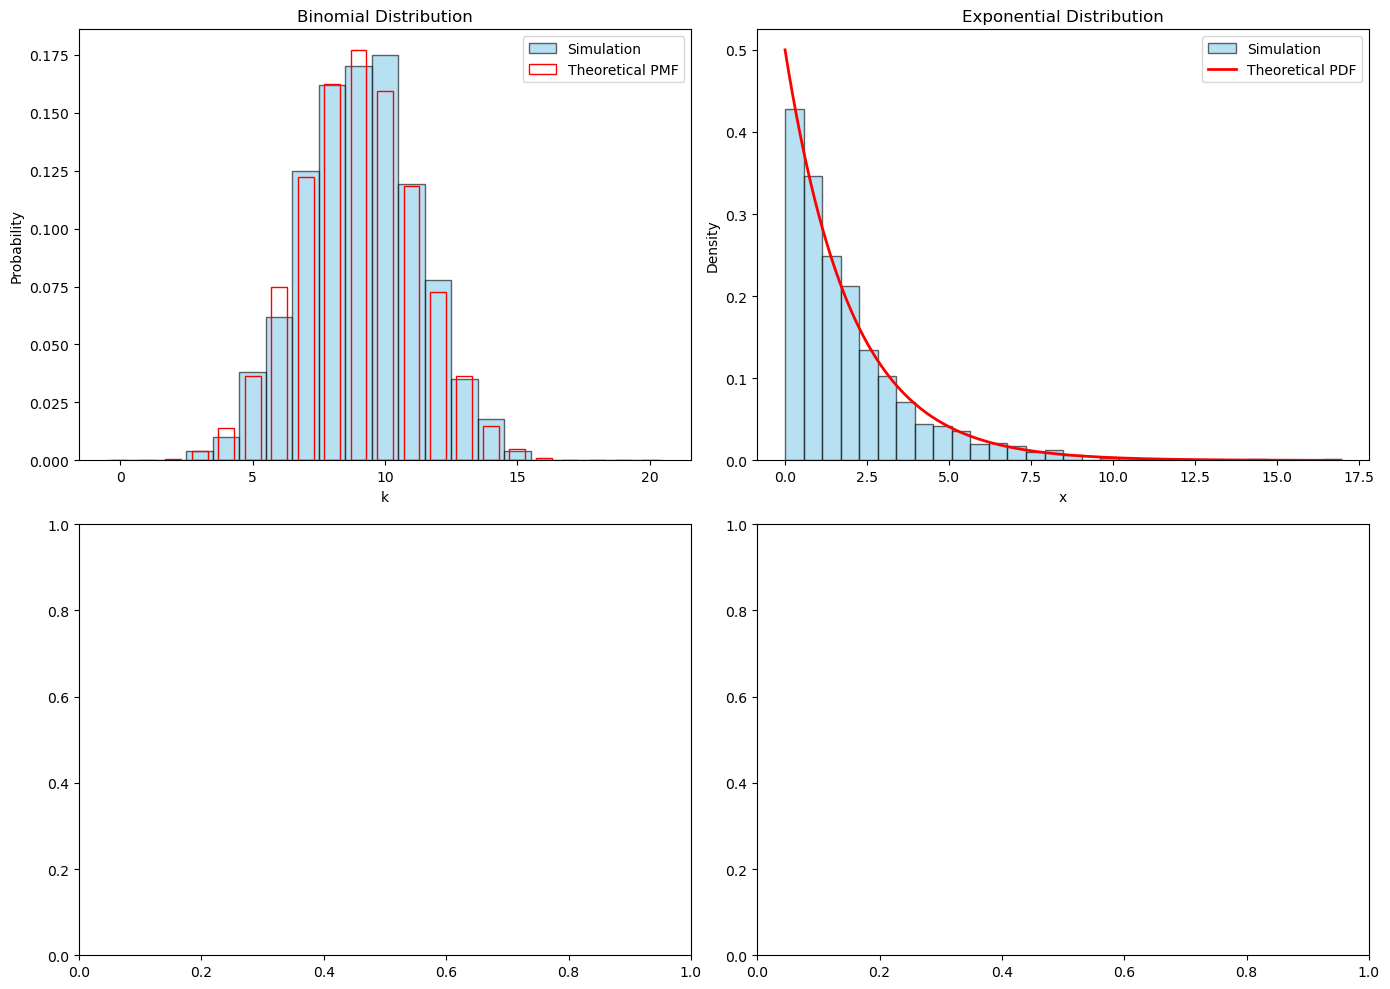

In [14]:
def main():
    # 1. Parameter Setup
    params = get_parameters(STUDENT_ID)
    print(f"Parameters for ID {STUDENT_ID}: {params}")
    
    # 2. Set Random Seed (Crucial for reproducibility!)
    # TODO: Set the seed using STUDENT_ID
    np.random.seed(STUDENT_ID)
    
    # 3. Simulation Configuration
    # You can try increasing this to 10000 to see smoother histograms
    N_SAMPLES = 1000 
    
    # 4. Generate Data (Call your functions)
    data_binom = generate_binomial_scratch(params['binom_n'], params['binom_p'], N_SAMPLES)
    data_exp = generate_exponential_scratch(params['exp_lam'], N_SAMPLES)
    data_norm = generate_normal_scratch(params['norm_mu'], params['norm_sigma'], N_SAMPLES, STUDENT_ID)
    data_uni = generate_uniform_scratch(params['uni_a'], params['uni_b'], N_SAMPLES)
    
    
    # 5. Visualization

    # Create 4 subplots at once and convert them into a one-dimensional list that can be accessed using indices. 
    # axes[0], axes[1], axes[2], axes[3] respectively represent individual canvases.
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten() #Flatten the two-dimensional array into a one-dimensional array
    
    # --- Plot 1: Binomial (Top-Left) ---
    # TODO: Plot histogram (remember density=True)
    n1 = params['binom_n']
    p1 = params['binom_p']
    
    axes[0].hist(
        data_binom,
        bins=np.arange(-0.5, n1 + 1.5, 1),  # align to integer
        density=True,
        alpha=0.6,
        edgecolor='black',
        color='skyblue',
        label='Simulation'
    )
    
    # TODO: Plot theoretical PMF (using stats.binom.pmf)
    x1 = np.arange(0, n1 + 1)
    pmf1 = stats.binom.pmf(x1, n1, p1)

    axes[0].bar(
        x1,
        pmf1,
        width=0.6,
        edgecolor='red',
        color='none',
        label='Theoretical PMF'
    )

    axes[0].set_title("Binomial Distribution")
    axes[0].set_xlabel("k")
    axes[0].set_ylabel("Probability")
    axes[0].legend()

    
    # --- Plot 2: Exponential (Top-Right) ---
    # TODO: Plot histogram
    n2 = params['exp_lam']
    lam2 = params['exp_lam']
    axes[1].hist(
        data_exp,
        bins=30,
        density=True,
        alpha=0.6,
        edgecolor='black',
        color='skyblue',
        label='Simulation'
    )

    # TODO: Plot theoretical PDF (using stats.expon.pdf - check 'scale' param!)
    x2 = np.linspace(0, max(data_exp), 300)
    pdf2 = stats.expon.pdf(x2, scale=1/lam2)

    axes[1].plot(
        x2,
        pdf2,
        'r',
        linewidth=2,
        label='Theoretical PDF'
    )

    axes[1].set_title("Exponential Distribution")
    axes[1].set_xlabel("x")
    axes[1].set_ylabel("Density")
    axes[1].legend()

    # --- Plot 3: Normal (Bottom-Left) ---
    # TODO: Plot histogram
    # TODO: Plot theoretical PDF (using stats.norm.pdf)
    
    # --- Plot 4: Uniform (Bottom-Right) ---
    # TODO: Plot histogram
    # TODO: Plot theoretical PDF (using stats.uniform.pdf)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

---

# Part 2: Mathematical Logic & Derivations

**Instructions:**
In this section, you must demonstrate the mathematical reasoning behind the two complex generators you implemented: **Exponential** and **Normal**.
* Do not just copy the formulas; **explain how the mathematical steps map to your Python code**.
* Use LaTeX for formulas (e.g., `$x = \dots$`).

---

### 1. Derivation for Exponential Distribution $Exp(\lambda)$
**Logic:** Inverse Transform Method

**Question: The Inverse & Code Logic**
To simulate $X$, we set the CDF equal to a uniform random number $U \sim Uniform(0,1)$, i.e., $F(X) = U$.
1.  Solve this equation for $X$ in terms of $U$.
2.  **Explain the Code:** Why does your Python code use `np.log(1-u)` (or just `np.log(u)`)? How does this correspond to your derived formula?

**Your Answer:**
*(Double-click to edit)*
Solving for $X$:
$$X = \dots$$

**Programming Explanation:**
(Explain why the natural logarithm `np.log` appears in your code and how it relates to solving for $x$ in the exponent...)


---

### 2. Derivation for Standard Normal Distribution $N(0, 1)$
**Logic:** Box-Muller Transform (Polar Coordinates)

The Box-Muller transform generates pairs of independent standard normal variables $(Z_0, Z_1)$ using two independent uniform variables $(U_1, U_2)$.

**Question 1: The System of Equations**
Based on the lecture slides (or standard derivation), write down the **pair** of equations that define $Z_0$ and $Z_1$ in terms of $U_1$ and $U_2$.

**Your Answer:**
*(Double-click to edit)*
$$Z_0 = \dots$$
$$Z_1 = \dots$$

**Question 2: Independence & Student ID Logic**
Mathematically, $Z_0$ and $Z_1$ generated from the equations in Question 1 are **independent**.
1.  Which of the two equations ($Z_0$ or $Z_1$) did you implement in your code based on your Student ID?
2.  If you had used the *other* equation, would the resulting distribution still be $N(0,1)$? Why?

**Your Answer:**
*(Double-click to edit)*
1. Based on my ID, I implemented the equation using...
2. ...
